In [139]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.decomposition import PCA

# load dataset and split train/test data

In [140]:
iris = datasets.load_iris()

In [141]:
X,y = iris['data'],iris['target']

In [142]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.3,stratify = y, random_state=1)

In [143]:
#Since we want to visualize the classification, we need to make sure the number of variables <= 3
#So we use PCA

In [144]:
sc = StandardScaler()
X_train_std = sc.fit_transform(X_train)
pca = PCA(n_components=None)
x_train_pca = pca.fit_transform(X_train_std)
pca.explained_variance_ratio_

array([ 0.73116511,  0.230545  ,  0.0330093 ,  0.00528059])

In [145]:
#so we can use 2 or 3 principle components to represent the 4 original variables, here we use 3 to maximaze the accuracy

# build workflow pipeline and run svm

In [146]:
from sklearn.svm import SVC
from sklearn.pipeline import make_pipeline

pipe_svm = make_pipeline(StandardScaler(),PCA(n_components = 3),SVC(kernel = 'linear',C = 1))

In [147]:
pipe_svm.fit(X_train,y_train)
y_pred = pipe_svm.predict(X_test)
print('Test Accuracy: %.3f' % pipe_svm.score(X_test, y_test))

Test Accuracy: 0.978


In [148]:
print('Train Accuracy: %.3f' % pipe_svm.score(X_train, y_train))

Train Accuracy: 0.971


In [149]:
#here we get a pretty good result, but let's check whether there are better choices of hyperparameters

# Tuning hyperparameters via grid search

In [150]:
param_range = [0.0001, 0.001, 0.01, 0.1,1.0, 10.0, 100.0, 1000.0]
param_grid = [{'svc__C':param_range,'svc__kernel':['linear']},{'svc__C':param_range,'svc__gamma':param_range,'svc__kernel':['rbf']}]

In [151]:
from sklearn.model_selection import GridSearchCV
pipe_svc = make_pipeline(StandardScaler(),PCA(n_components = 3),SVC(random_state=1))
gs = GridSearchCV(estimator = pipe_svc, param_grid = param_grid,scoring = 'accuracy', cv = 10, n_jobs=-1)
gs = gs.fit(X_train,y_train)
print(gs.best_score_)

0.952380952381


In [152]:
print(gs.best_params_) # here we can see the best choice is the same as what we try at the first time

{'svc__C': 1.0, 'svc__kernel': 'linear'}


In [153]:
best_est = gs.best_estimator_

In [154]:
best_est.fit(X_train,y_train)

Pipeline(steps=[('standardscaler', StandardScaler(copy=True, with_mean=True, with_std=True)), ('pca', PCA(copy=True, iterated_power='auto', n_components=3, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)), ('svc', SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape=None, degree=3, gamma='auto', kernel='linear',
  max_iter=-1, probability=False, random_state=1, shrinking=True,
  tol=0.001, verbose=False))])

In [155]:
print('Test accuracy: %.3f' % best_est.score(X_test, y_test)) # a same accuracy as we see above

Test accuracy: 0.978


# visualize the classification

                                             

In [156]:
sc = StandardScaler()
X_train_std = sc.fit_transform(X_train)
X_test_std = sc.transform(X_test)
pca = PCA(n_components=3)
X_train_pca = pca.fit_transform(X_train_std)
X_test_pca = pca.transform(X_test_std)
X_combined = np.vstack((X_train_pca, X_test_pca))
y_combined = np.hstack((y_train, y_test))

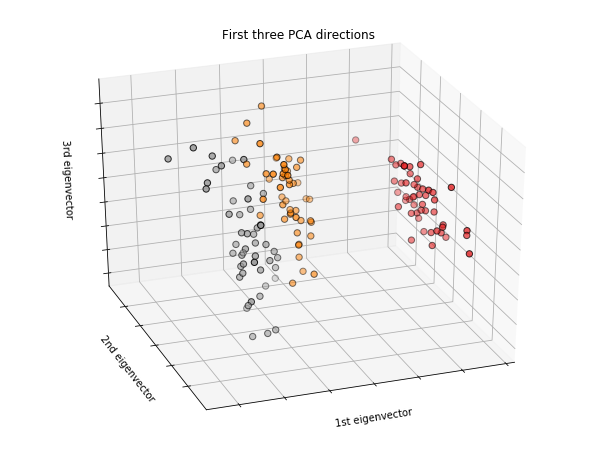

In [157]:
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure(1, figsize=(8, 6))
ax = Axes3D(fig, elev=-150, azim=110)


X_reduced = X_combined


ax.scatter(X_reduced[:, 0], X_reduced[:, 1], X_reduced[:, 2], c=y_combined,
           cmap=plt.cm.Set1, edgecolor='k', s=40)
ax.set_title("First three PCA directions")
ax.set_xlabel("1st eigenvector")
ax.w_xaxis.set_ticklabels([])
ax.set_ylabel("2nd eigenvector")
ax.w_yaxis.set_ticklabels([])
ax.set_zlabel("3rd eigenvector")
ax.w_zaxis.set_ticklabels([])

plt.show()

In [158]:
#let's see how well our model perform on 2 dimensions and visualise it

In [159]:
#let's find the best choice first
from sklearn.model_selection import GridSearchCV
pipe_svc = make_pipeline(StandardScaler(),PCA(n_components = 2),SVC(random_state=1))
gs = GridSearchCV(estimator = pipe_svc, param_grid = param_grid,scoring = 'accuracy', cv = 10, n_jobs=-1)
gs = gs.fit(X_train,y_train)
print(gs.best_params_)

{'svc__C': 0.1, 'svc__kernel': 'linear'}


In [160]:
#run this choice again

In [161]:
sc = StandardScaler()
X_train_std = sc.fit_transform(X_train)
X_test_std = sc.transform(X_test)
pca = PCA(n_components=2)
X_train_pca = pca.fit_transform(X_train_std)
X_test_pca = pca.transform(X_test_std)
X_combined = np.vstack((X_train_pca, X_test_pca))
y_combined = np.hstack((y_train, y_test))

In [162]:
svm = SVC(kernel='linear',C=0.1)
svm.fit(X_train_pca,y_train)
svm.score(X_test_pca,y_test)

0.82222222222222219

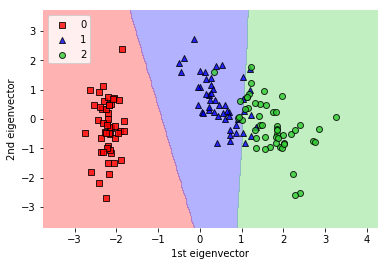

In [163]:
#visualize this model
from mlxtend.plotting import plot_decision_regions
plot_decision_regions(X_combined,y_combined,clf=svm,res=0.02, legend=2)
plt.xlabel("1st eigenvector")
plt.ylabel("2nd eigenvector")
plt.legend(loc='upper left')
plt.show()